## LEAD SCORING CASE STUDY

### PROBLEM STATEMENT:-

An education company named X Education sells online courses to industry professionals. On any given day, many professionals 
who are interested in the courses land on their website and browse for courses.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads
in a day, only about 30 of them are converted. 
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert 
into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such
that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower 
conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



Goal:-

There are quite a few goals for this case study-

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company
to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score 
would mean that the lead is cold and will mostly not get converted.


### Step 1: Reading and Understanding the Data

In [4]:
# IMPORTING LIBRARY'S:-

# Suppressing Warnings-
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Importing leads dataset

leads_data = pd.read_csv("Lead Scoring Assignment-2/Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataset

In [7]:
leads_data.shape

(9240, 37)

In [8]:
# checking non null count and datatype of the variables-

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### All the dataypes of the variables are in correct format.

In [10]:
# Checking the numerical variables of dataset:-

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Inference:-
We have 9240 rows and 37 columns in our leads dataset and there are missing values present in our data.


## Step 2:Data cleaning and manupulation

### 1)Handling the 'Select' level that is present in many of the categorical variables.¶

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, 
hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.



In [14]:
# Converting 'Select' values to NaN-

leads_data = leads_data.replace('Select', np.nan)

### 2)Missing value check

In [16]:

# checking the columns for null values-

leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
# Finding the null percentages across columns-

round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### We see that for some columns we have high percentage of missing values.We can drop the columns with missing values greater than 40%.

In [19]:
# dropping the columns with missing values greater than or equal to 40% .

leads_data=leads_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [20]:
# Finding the null percentages across columns after removing the above columns-

round(leads_data.isnull().sum()/len(leads_data.index),2)*100


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided','others'.This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [22]:
leads_data['Specialization'] = leads_data['Specialization'].fillna('others') 
leads_data['What matters most to you in choosing a course']=leads_data['What matters most to you in choosing a course'].fillna('not provided')
leads_data['Country'] = leads_data['Country'].fillna('not provided')
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('not provided')
leads_data['City']=leads_data['City'].fillna('not provided')
leads_data['Tags']=leads_data['Tags'].fillna('not provided')


In [23]:
#checking value counts of Lead Source column

leads_data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

### We can group some of the lower frequency occuring labels under a common label 'Others'

In [25]:
#replacing Nan Values and combining low frequency values:-

leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Others')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('Facebook','Social Media')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

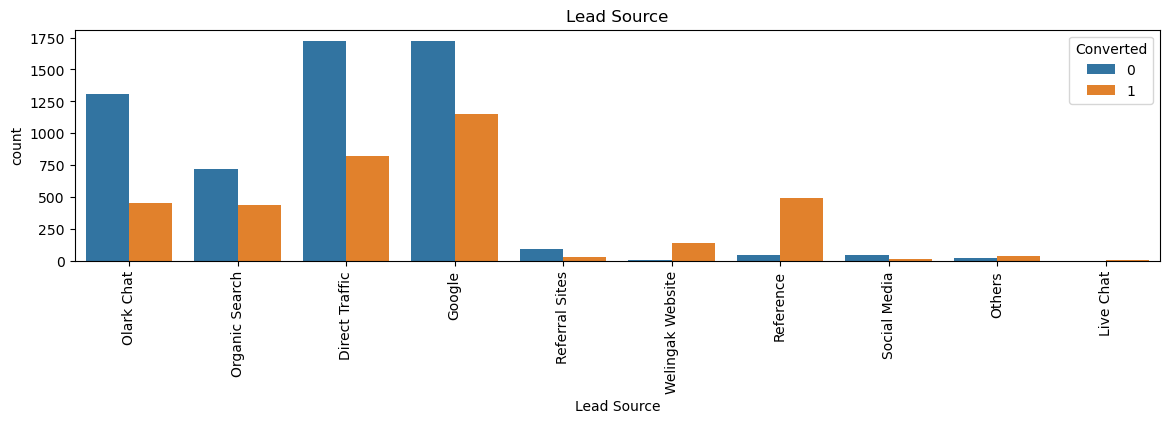

In [26]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(14,3))
sns.countplot(x='Lead Source', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

### Inference:-

-Maximum number of leads are generated by Google and Direct traffic.

-Conversion Rate of reference leads and leads through welingak website is high.

-To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


In [28]:
# Last Activity:

leads_data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [29]:
#replacing Nan Values and combining low frequency values

leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan,'Others')


In [30]:
# Last Activity:

leads_data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

### Rest missing values are under 2% so we can drop these rows.

In [32]:
# Dropping the rows with null values-

leads_data.dropna(inplace = True)

In [33]:
# Finding the null percentages across columns after removing the above columns-

round(leads_data.isnull().sum()/len(leads_data.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### Now we don't have any missing value in the dataset.

In [35]:
#Checking for duplicates:-

leads_data[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### We see there are no duplicate records in our lead dataset.

In [37]:
#Since Prospect ID and Lead Number both convey the same information, i.e id of the person.
# Lead Number doesnt contain any duplicated values,so  we can drop Prospect ID.

leads_data.drop(columns=["Prospect ID"], axis=1,inplace=True)

In [38]:
# Checking if there are columns with one unique value since it won't affect our analysis-

leads_data.nunique()

Lead Number                                      9103
Lead Origin                                         4
Lead Source                                        10
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [39]:
# Dropping unique valued columns-

leads_data= leads_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [40]:
leads_data.shape

(9103, 24)

In [41]:
# Percentage of rows retained :-

(len(leads_data.index)/9240)*100

98.51731601731602

In [42]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted


38.02043282434362

###  Step 3: Data Preparation and Visualization

In [44]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 non-n

In [45]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,not provided,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Ringing,not provided,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


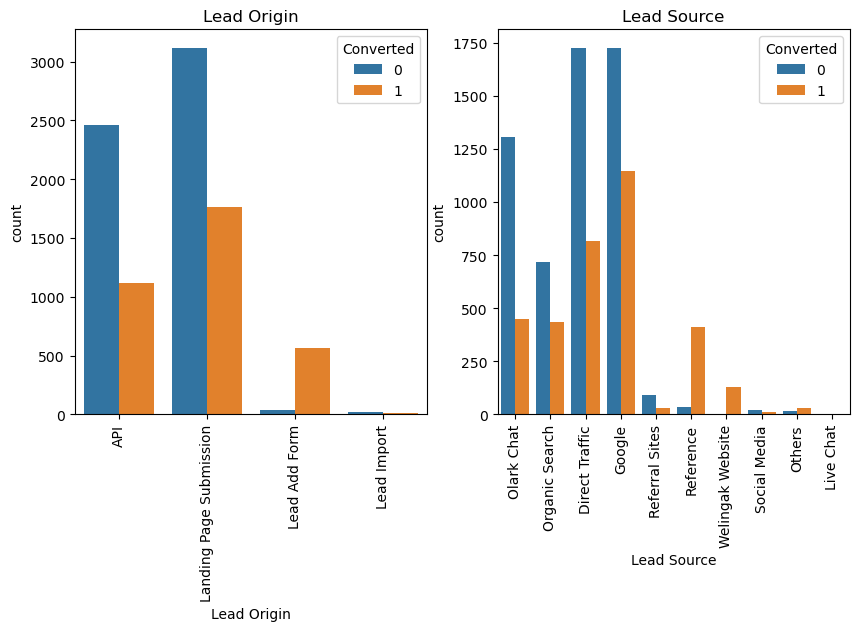

In [46]:
# Visualising Categorical variables:-

#Relating all the categorical variables to Converted:-

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

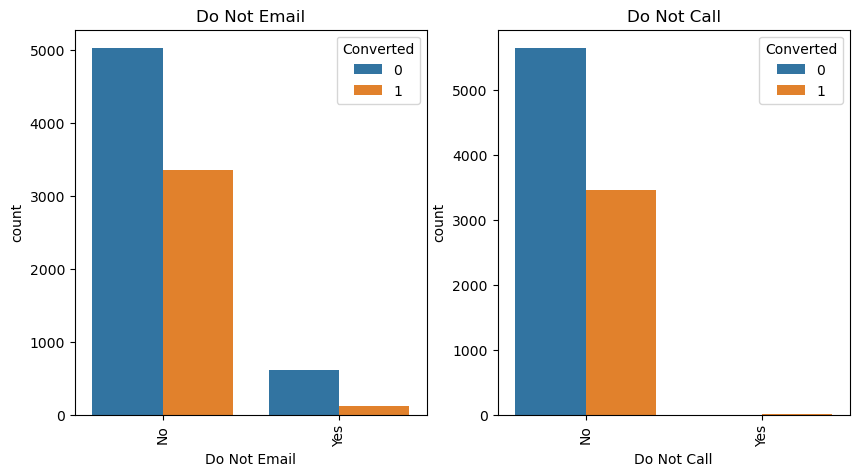

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()



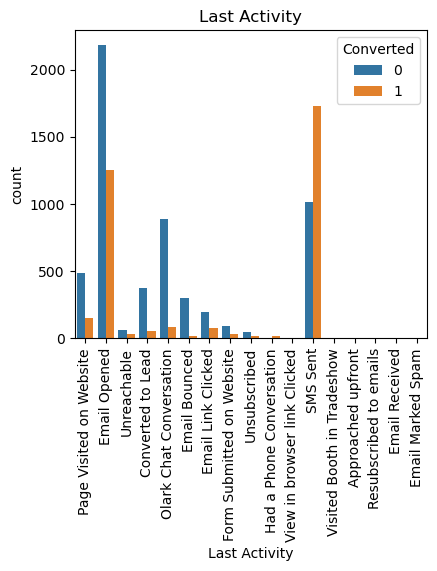

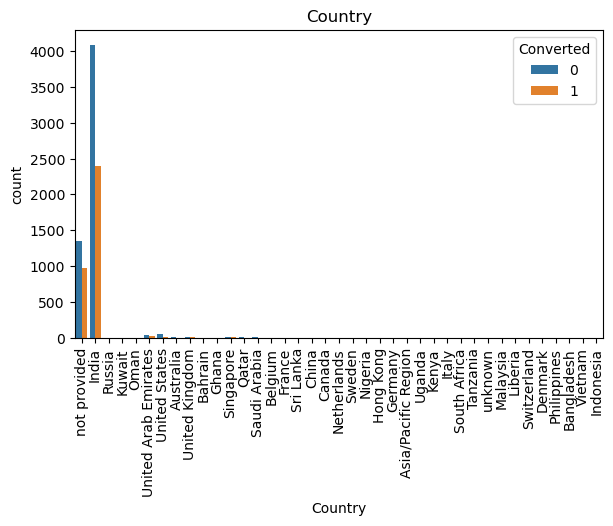

In [48]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.figure(figsize = (15,4))
plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

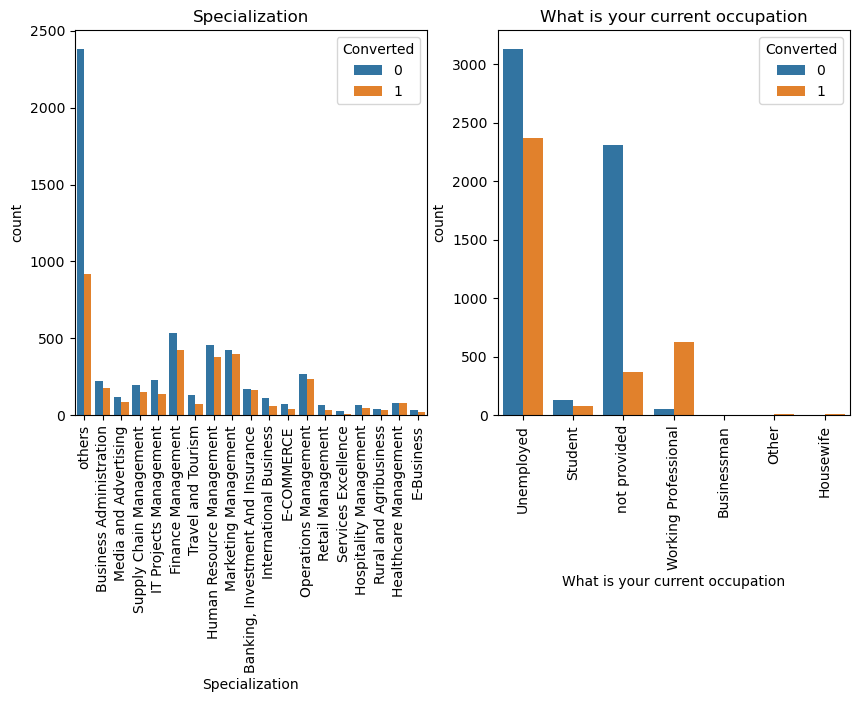

In [49]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=leads_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


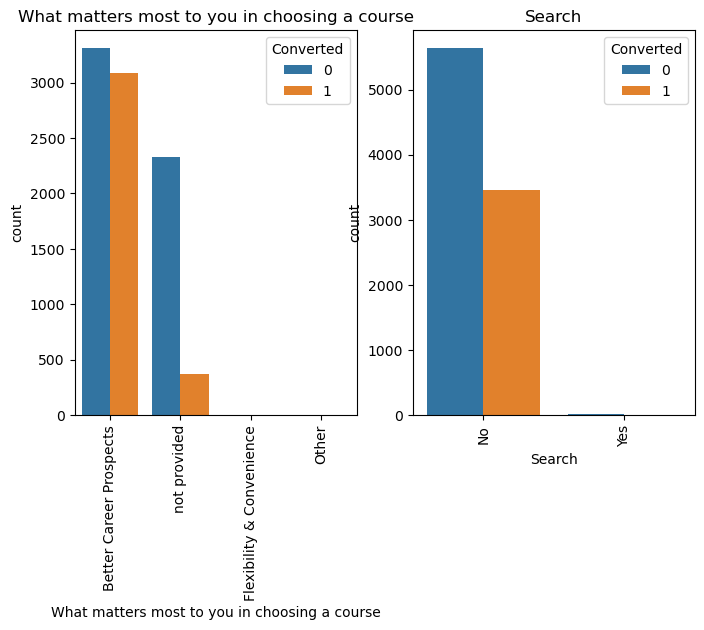

In [50]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

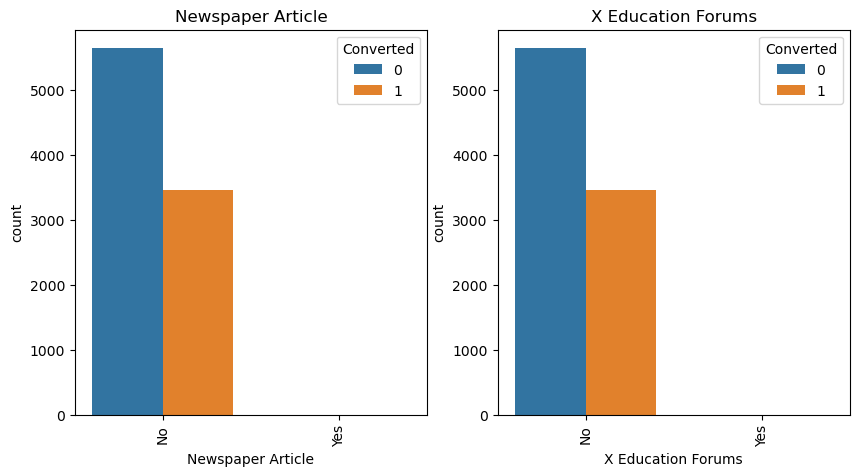

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

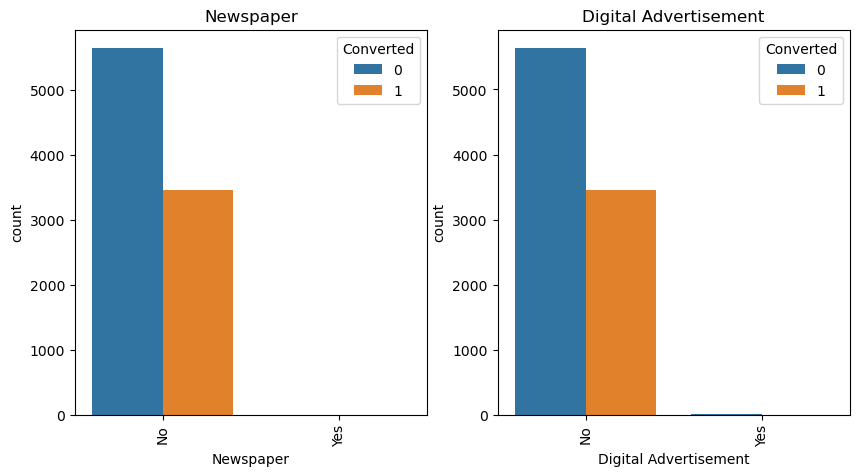

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()


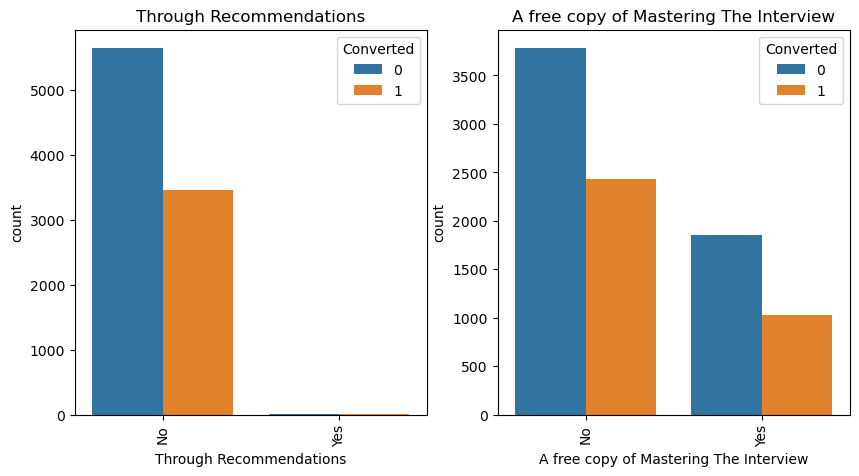

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data=leads_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

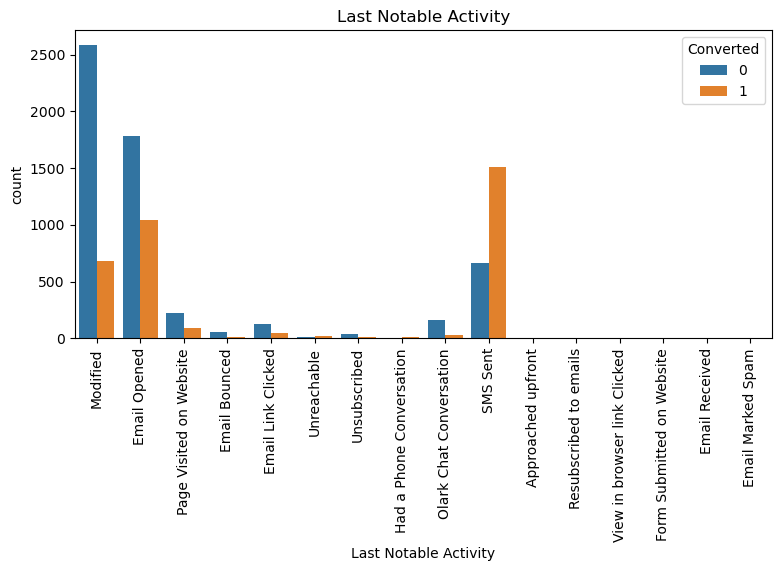

In [54]:
plt.figure(figsize = (9,4))
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'not provided'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Closed by Horizzon'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22,

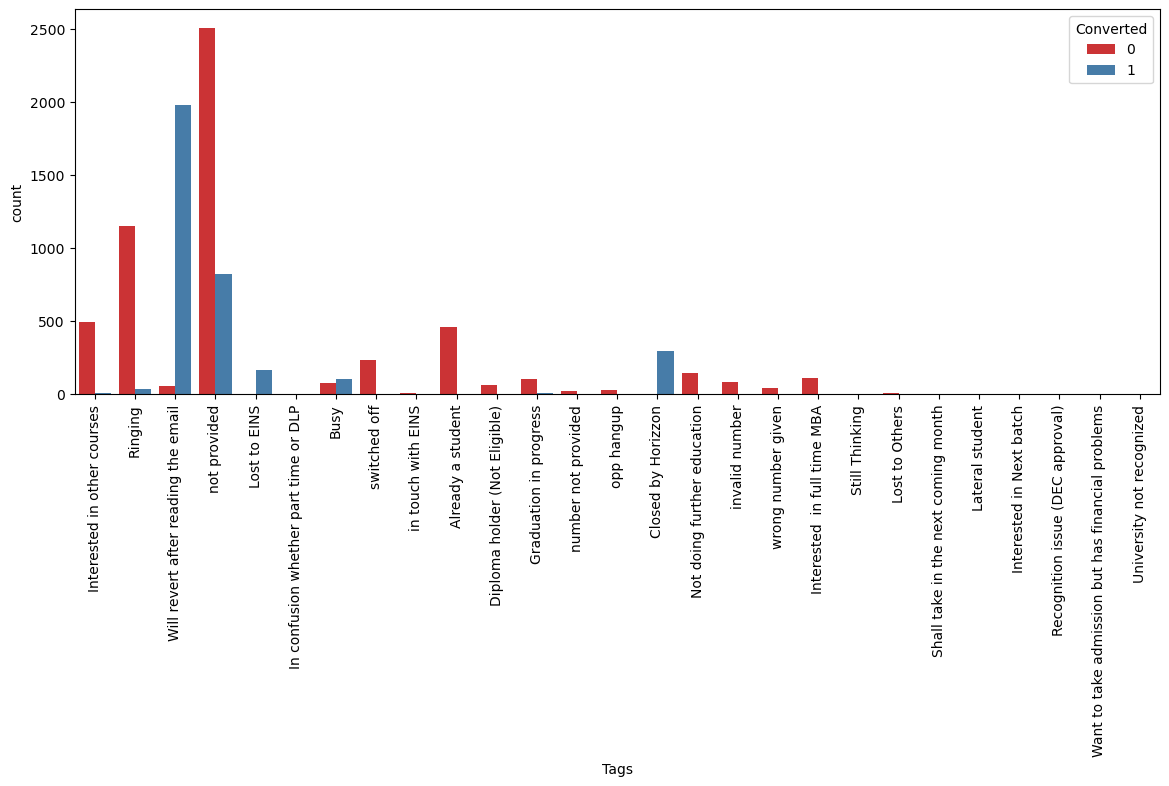

In [55]:
plt.figure(figsize=(14,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)

### Visualising Numerical Variables:-


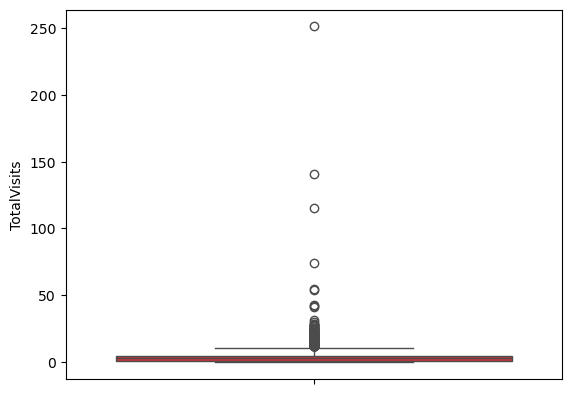

In [57]:
#1)TotalVisits:-

sns.boxplot(leads_data['TotalVisits'],orient='vert',palette='Set1')
plt.show()

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [59]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

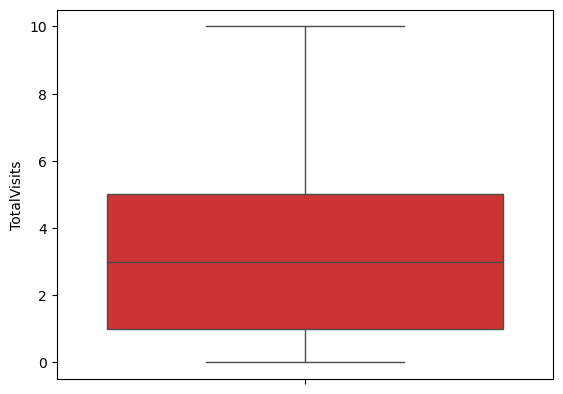

In [60]:
# Visualizing again
sns.boxplot(leads_data['TotalVisits'],orient='vert',palette='Set1')
plt.show()

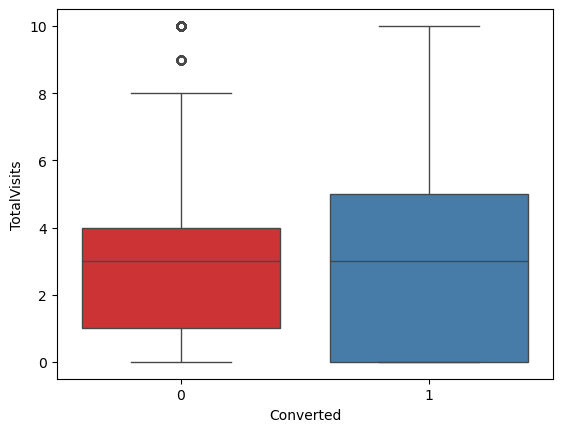

In [61]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data,palette='Set1')
plt.show()

### Inference¶

Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

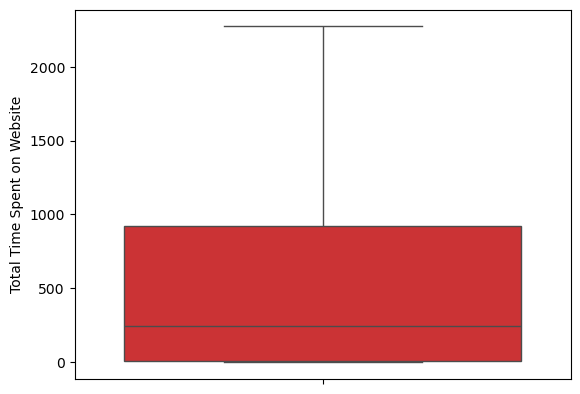

In [63]:
#2)Total Time Spent on Website-

sns.boxplot(leads_data['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

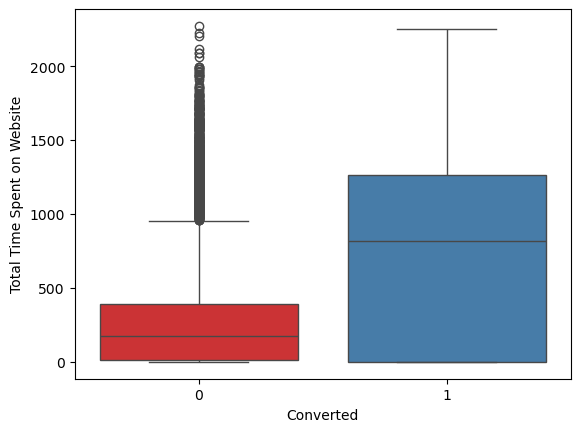

In [64]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data,palette='Set1')
plt.show()

### Inference

Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

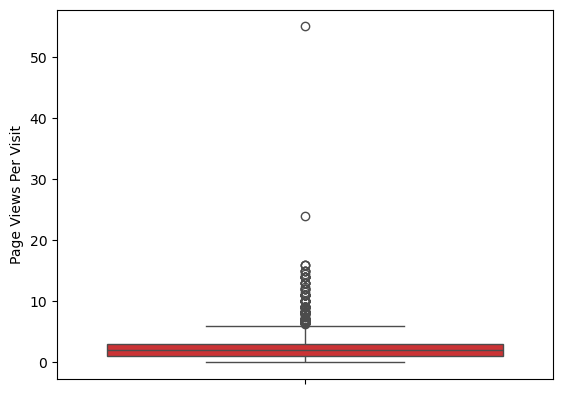

In [66]:
#3)Page Views Per Visit;-
sns.boxplot(leads_data['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [68]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

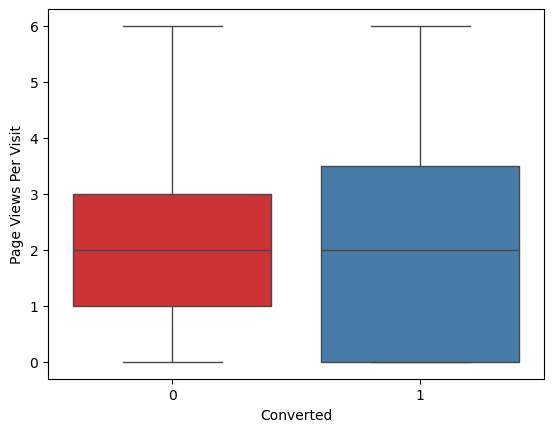

In [69]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads_data,palette='Set1')
plt.show()

### Inference¶

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

### Based on the analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [72]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 non-n

In [73]:
leads_data=leads_data.drop(columns=['Lead Number','Country','Search','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Do Not Call','Tags'
                            ,'What matters most to you in choosing a course'])

In [74]:
leads_data.shape

(9103, 13)

### Data Preparation

In [76]:
#1) Converting some binary variables (Yes/No) to 1/0:

vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_data[vars] = leads_data[vars].apply(binary_map)


In [77]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,not provided,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,not provided,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,0,Modified


In [78]:
#2)Creating Dummy variables for the categorical features and dropping the first one.

leads_data.loc[:,leads_data.dtypes == 'object'].columns


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [79]:
# Create dummy variables using the 'get_dummies':

dummy = pd.get_dummies(leads_data[['Lead Origin','Specialization','Lead Source','City','Last Activity','What is your current occupation','Last Notable Activity']],drop_first=True,dtype=int)


# Add the results to the master dataframe:

leads_data= pd.concat([leads_data, dummy], axis=1)
leads_data.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [80]:
#Dropping the columns for which dummies were created:

leads_data = leads_data.drop(['Lead Origin','Specialization','Lead Source','City','Last Activity','What is your current occupation','Last Notable Activity'],axis =1)


In [81]:
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step4: Test-Train Split

In [83]:
# Import the required library
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variable to X

X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
# Putting target variable to y:

y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
# Split the dataset into 70% and 30% for train and test respectively:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [87]:
X_train.shape

(6372, 78)

In [88]:
X_test.shape

(2731, 78)

In [89]:
# Scaling the features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
                                         
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.294015,-0.068258,1.476324,-0.423364,-0.681042,0.929356,-0.26968,-0.064008,-0.208309,-0.07948,...,0.0,-0.037609,-0.745938,-0.147122,-0.193512,-0.012528,1.776670,-0.06276,-0.071044,-0.012528
5520,-0.294015,1.362470,-0.771066,2.083179,-0.681042,0.929356,-0.26968,-0.064008,-0.208309,-0.07948,...,0.0,-0.037609,-0.745938,-0.147122,-0.193512,-0.012528,-0.562851,-0.06276,-0.071044,-0.012528
1962,-0.294015,0.647106,-0.571257,0.133646,-0.681042,0.929356,-0.26968,-0.064008,-0.208309,-0.07948,...,0.0,-0.037609,1.340593,-0.147122,-0.193512,-0.012528,-0.562851,-0.06276,-0.071044,-0.012528
1566,-0.294015,2.435517,1.393834,0.690655,-0.681042,0.929356,-0.26968,-0.064008,-0.208309,-0.07948,...,0.0,-0.037609,-0.745938,-0.147122,-0.193512,-0.012528,-0.562851,-0.06276,-0.071044,-0.012528
9170,-0.294015,-1.141305,-0.881052,-1.258878,-0.681042,-1.076014,-0.26968,-0.064008,-0.208309,-0.07948,...,0.0,-0.037609,-0.745938,-0.147122,-0.193512,-0.012528,-0.562851,-0.06276,-0.071044,-0.012528


### Step5. Model Building

In [91]:
#Import the necessary libraries for model building:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE


In [93]:
# Running RFE with 15 variables as output


rfe = RFE(logreg, n_features_to_select=15)                   # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [94]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False])

In [95]:
# Features that have been selected by RFE:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMMERCE', False, 51),
 ('Specialization_Finance Management', False, 42),
 ('Specialization_Healthcare Management', False, 50),
 ('Specialization_Hospitality Management', False, 18),
 ('Specialization_Human Resource Management', False, 41),
 ('Specialization_IT Projects Management', False, 53),
 ('Specialization_International Business', False, 49),
 ('Specialization_Marketing Management', False, 56),
 ('Specialization_Media and Advertising', False, 40),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 

In [96]:
# Viewing columns selected by RFE:

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_others', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

### Assessing the model with StatsModels

### MODEL-1

In [99]:
# Importing statsmodels

import statsmodels.api as sm

In [100]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.5
Date:                Tue, 18 Feb 2025   Deviance:                       5161.0
Time:                        00:47:15   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6914      0.041    -17.006      0.000      -0.771      -0.612
Do Not Email                                            -0.4467      0.046     -9.800      0.000      -0.536      -0.357
TotalVisits                                              0.1497      0.045      3.309      0.001       0.061       0.238
Total Time Spent on Website                              1.0714      0.040     26.541      0.000       0.992       1.151
Lead Origin_Landing Page Submission                     -0.4254      0.062     -6.819      0.000      -0.548      -0.303
Lead Origin_Lead Add Form                                0.8542      0.061     13.949      0.000       0.734       0.974
Specialization_others                                   -0.3534      0.059     -6.032      0.000      -0.468      -0.239
Lead Source_Olark Chat                                   0.4502      0.053      8.499      0.000       0.346       0.554
Lead Source_Welingak Website                             0.2810      0.093      3.024      0.002       0.099       0.463
Last Activity_Converted to Lead                         -0.2713      0.047     -5.786      0.000      -0.363      -0.179
Last Activity_Olark Chat Conversation                   -0.5445      0.054    -10.007      0.000      -0.651      -0.438
Last Activity_Page Visited on Website                   -0.2937      0.040     -7.403      0.000      -0.371      -0.216
What is your current occupation_Working Professional     0.6360      0.050     12.806      0.000       0.539       0.733
What is your current occupation_not provided            -0.5183      0.040    -12.870      0.000      -0.597      -0.439
Last Notable Activity_Email Opened                      -0.5227      0.039    -13.348      0.000      -0.599      -0.446
Last Notable Activity_Modified                          -0.5479      0.045    -12.291      0.000      -0.635      -0.461
========================================================================================================================
"""

#### Since P-value of 'Lead Source_Welingak Website' is very high, we can drop this column.

In [102]:
cols1=cols.drop('Lead Source_Welingak Website')
cols1

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_others', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

### Model-2

In [104]:
#Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[cols1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.3
Date:                Tue, 18 Feb 2025   Deviance:                       5176.6
Time:                        00:47:15   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4027
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6951      0.040    -17.440      0.000      -0.773      -0.617
Do Not Email                                            -0.4381      0.045     -9.776      0.000      -0.526      -0.350
TotalVisits                                              0.1523      0.045      3.367      0.001       0.064       0.241
Total Time Spent on Website                              1.0715      0.040     26.555      0.000       0.992       1.151
Lead Origin_Landing Page Submission                     -0.4060      0.062     -6.521      0.000      -0.528      -0.284
Lead Origin_Lead Add Form                                0.9706      0.058     16.651      0.000       0.856       1.085
Specialization_others                                   -0.3270      0.058     -5.590      0.000      -0.442      -0.212
Lead Source_Olark Chat                                   0.4500      0.053      8.507      0.000       0.346       0.554
Last Activity_Converted to Lead                         -0.2709      0.047     -5.781      0.000      -0.363      -0.179
Last Activity_Olark Chat Conversation                   -0.5437      0.054    -10.032      0.000      -0.650      -0.437
Last Activity_Page Visited on Website                   -0.2950      0.040     -7.437      0.000      -0.373      -0.217
What is your current occupation_Working Professional     0.6348      0.050     12.779      0.000       0.537       0.732
What is your current occupation_not provided            -0.5201      0.040    -12.921      0.000      -0.599      -0.441
Last Notable Activity_Email Opened                      -0.5230      0.039    -13.365      0.000      -0.600      -0.446
Last Notable Activity_Modified                          -0.5478      0.044    -12.320      0.000      -0.635      -0.461
========================================================================================================================
"""

#### Since P-value of 'TotalVisits'  we can drop this column.

In [106]:
cols1 = cols1.drop('TotalVisits')
cols1


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_others', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

### Model-3

In [108]:
#Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[cols1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.0
Date:                Tue, 18 Feb 2025   Deviance:                       5188.0
Time:                        00:47:16   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4017
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6922      0.040    -17.408      0.000      -0.770      -0.614
Do Not Email                                            -0.4438      0.045     -9.953      0.000      -0.531      -0.356
Total Time Spent on Website                              1.0790      0.040     26.800      0.000       1.000       1.158
Lead Origin_Landing Page Submission                     -0.4062      0.062     -6.530      0.000      -0.528      -0.284
Lead Origin_Lead Add Form                                0.9214      0.056     16.348      0.000       0.811       1.032
Specialization_others                                   -0.3507      0.058     -6.042      0.000      -0.464      -0.237
Lead Source_Olark Chat                                   0.3783      0.048      7.875      0.000       0.284       0.472
Last Activity_Converted to Lead                         -0.2922      0.046     -6.296      0.000      -0.383      -0.201
Last Activity_Olark Chat Conversation                   -0.5345      0.054     -9.915      0.000      -0.640      -0.429
Last Activity_Page Visited on Website                   -0.2702      0.039     -6.965      0.000      -0.346      -0.194
What is your current occupation_Working Professional     0.6297      0.050     12.700      0.000       0.533       0.727
What is your current occupation_not provided            -0.5173      0.040    -12.874      0.000      -0.596      -0.439
Last Notable Activity_Email Opened                      -0.5219      0.039    -13.350      0.000      -0.598      -0.445
Last Notable Activity_Modified                          -0.5604      0.044    -12.656      0.000      -0.647      -0.474
========================================================================================================================
"""

### Since 'All' the p-values are 0 we can check the Variance Inflation Factor to see if there is any correlation between the variables.

### Checking VIF:

In [111]:
# Check for the VIF values of the feature variables: 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values, i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.28
4,Specialization_others,2.80
5,Lead Source_Olark Chat,1.92
12,Last Notable Activity_Modified,1.61
7,Last Activity_Olark Chat Conversation,1.49
3,Lead Origin_Lead Add Form,1.48
11,Last Notable Activity_Email Opened,1.47
1,Total Time Spent on Website,1.32
6,Last Activity_Converted to Lead,1.19
10,What is your current occupation_not provided,1.15


### Since the P-values of all variables is 0 and VIF values are low for all the variables,model-7 is our final model.We have 13 variables in our final model.

#### Making Prediction on the Train set

In [114]:
# Getting the predicted values on the train set:

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.849539
5520    0.138871
1962    0.084918
1566    0.948722
9170    0.289856
5097    0.115686
8954    0.488223
309     0.194162
5519    0.288411
1050    0.552440
dtype: float64

In [115]:
# Reshaping into an array:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84953913, 0.13887134, 0.08491771, 0.94872237, 0.28985567,
       0.11568633, 0.48822339, 0.19416226, 0.28841133, 0.55243978])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.849539,7962
1,0,0.138871,5520
2,0,0.084918,1962
3,1,0.948722,1566
4,0,0.289856,9170


In [118]:
#Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels¶

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head-
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.849539,7962,1
1,0,0.138871,5520,0
2,0,0.084918,1962,0
3,1,0.948722,1566,1
4,0,0.289856,9170,0


### Step:6 Model Evaluation

In [120]:
#Making the Confusion matrix:-

In [121]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [122]:
# Creating confusion matrix :

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3527  426]
 [ 726 1693]]


In [123]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3470     435
# converted            722      1724 

In [124]:
# Let's check the overall accuracy:

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8192090395480226


### Metrics beyond simply accuracy

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Sensitivity of our logistic regression model:

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6998759818106656


In [128]:
# Let us calculate specificity:
print("Specificity : ",TN / float(TN+FP))


Specificity :  0.8922337465216291


In [129]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10776625347837086


In [130]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7989617744218971


#### We found out that our specificity was good (~89.2%) and our sensitivity (70 %). Hence, this needed to be taken care of.¶



### Step:7. Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one

#### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:

fpr,tpr,thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob,drop_intermediate = False)

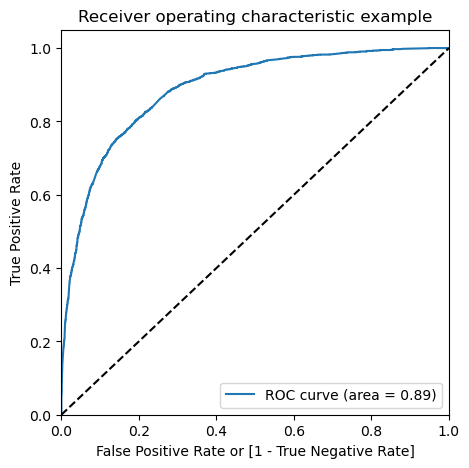

In [136]:
# Call the ROC function:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.



### Step 8: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [139]:
# Let's create columns with different probability cutoffs :

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.849539,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.138871,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.084918,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.948722,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.289856,9170,0,1,1,1,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.-

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.622097  0.975610  0.405768
0.2   0.2  0.748431  0.917735  0.644827
0.3   0.3  0.794570  0.835469  0.769542
0.4   0.4  0.811519  0.766846  0.838857
0.5   0.5  0.819209  0.699876  0.892234
0.6   0.6  0.806654  0.608929  0.927650
0.7   0.7  0.789391  0.529558  0.948394
0.8   0.8  0.758788  0.416288  0.968378
0.9   0.9  0.717514  0.275734  0.987857


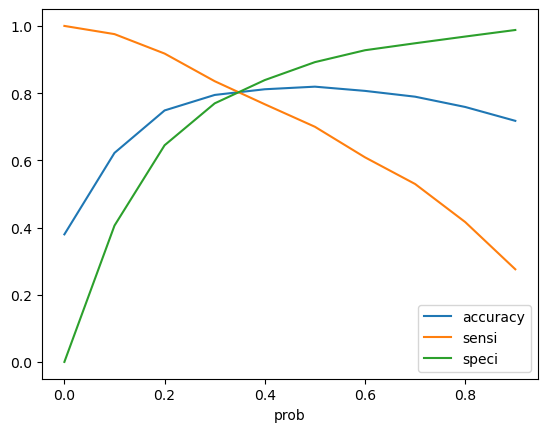

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.


In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.849539,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.138871,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.084918,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.948722,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.289856,9170,0,1,1,1,0,0,0,0,0,0,0,0


#### Assigning Lead Score to the Training data

In [145]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.849539,7962,1,1,1,1,1,1,1,1,1,1,0,1,85
1,0,0.138871,5520,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.084918,1962,0,1,0,0,0,0,0,0,0,0,0,0,8
3,1,0.948722,1566,1,1,1,1,1,1,1,1,1,1,1,1,95
4,0,0.289856,9170,0,1,1,1,0,0,0,0,0,0,0,0,29


In [146]:
#Model Evaluation

# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8086942875078468


In [147]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3260,  693],
       [ 526, 1893]])

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7825547747002893


In [150]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8246901087781432


In [151]:
from sklearn.metrics import precision_score,recall_score

In [152]:
# Precision = TP / TP + FP

print("Precision  : ",precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision  :  0.7320185614849188


In [153]:
#Recall = TP / TP + FN

print("Recall  : ",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall  :  0.7825547747002893


#### With the current cut off as 0.38 we have Precision-73.2% around  and Recall around 78.2%


## Making predictions on the test set

### Scaling the test data

In [157]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,-0.293797,-0.058621,-0.108519,0.416452,1.463794,0.928236,-0.262459,-0.042827,4.402340,-0.079144,...,-0.019139,-0.042827,-0.755277,-0.133755,-0.182471,0.0,-0.552675,-0.050693,-0.074316,0.0
4050,-0.293797,-1.150166,-0.888077,-1.263530,-0.683156,-1.077312,3.810124,-0.042827,4.402340,-0.079144,...,-0.019139,-0.042827,-0.755277,-0.133755,-0.182471,0.0,1.809383,-0.050693,-0.074316,0.0
7201,3.403712,-0.422469,0.420993,-0.143542,1.463794,0.928236,-0.262459,-0.042827,-0.227152,-0.079144,...,-0.019139,-0.042827,-0.755277,-0.133755,-0.182471,0.0,1.809383,-0.050693,-0.074316,0.0
1196,-0.293797,0.305228,-0.110357,0.976446,1.463794,0.928236,-0.262459,-0.042827,-0.227152,-0.079144,...,-0.019139,-0.042827,-0.755277,-0.133755,-0.182471,0.0,-0.552675,-0.050693,-0.074316,0.0
8219,-0.293797,1.396773,-0.433947,-0.283540,1.463794,0.928236,-0.262459,-0.042827,-0.227152,-0.079144,...,-0.019139,-0.042827,-0.755277,-0.133755,5.480337,0.0,-0.552675,-0.050693,-0.074316,0.0


In [158]:
# Assigning the columns selected by the final model to the X_test 

X_test = X_test[cols1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_others,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Email Opened,Last Notable Activity_Modified
3504,-0.293797,-0.108519,0.928236,-0.262459,-0.758269,-0.494157,-0.226259,-0.340007,-0.271120,-0.287126,-0.656766,1.466268,-0.755277
4050,-0.293797,-0.888077,-1.077312,3.810124,-0.758269,-0.494157,-0.226259,-0.340007,-0.271120,-0.287126,-0.656766,-0.682003,-0.755277
7201,3.403712,0.420993,0.928236,-0.262459,-0.758269,-0.494157,-0.226259,-0.340007,-0.271120,-0.287126,-0.656766,-0.682003,-0.755277
1196,-0.293797,-0.110357,0.928236,-0.262459,-0.758269,-0.494157,-0.226259,-0.340007,-0.271120,-0.287126,-0.656766,1.466268,-0.755277
8219,-0.293797,-0.433947,0.928236,-0.262459,-0.758269,-0.494157,-0.226259,-0.340007,3.688398,-0.287126,-0.656766,-0.682003,-0.755277


In [159]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.253387
4050    0.977387
7201    0.263284
1196    0.253012
8219    0.200898
8747    0.118114
9048    0.237964
6524    0.164558
7693    0.104350
8187    0.954259
dtype: float64

In [160]:
# Converting y_test_pred to a dataframe which is an array:
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
# Let's see the head
y_pred_1.head()

,0
3504,0.253387
4050,0.977387
7201,0.263284
1196,0.253012
8219,0.200898


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side :

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1:

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [166]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.253387
1,1,4050,0.977387
2,0,7201,0.263284
3,0,1196,0.253012
4,1,8219,0.200898


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [168]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3504,0,0.253387
1,4050,1,0.977387
2,7201,0,0.263284
3,1196,0,0.253012
4,8219,1,0.200898


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [171]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3504,0,0.253387,0
1,4050,1,0.977387,1
2,7201,0,0.263284,0
3,1196,0,0.253012,0
4,8219,1,0.200898,0


In [172]:
# Let's check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.816550714024167


In [173]:
# Making the confusion matrix:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  292],
       [ 209,  833]])

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7994241842610365


In [176]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8271166370633511


In [177]:
from sklearn.metrics import precision_score,recall_score

In [178]:
# Precision = TP / TP + FP
print("Precision  : ",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision  :  0.7404444444444445


In [179]:
#Recall = TP / TP + FN
print("Recall  : ",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall  :  0.7994241842610365


### With the current cut off as 0.38 we have Precision-74 % around and Recall around 80 %

### Assigning Lead Score to the Testing data

In [182]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.253387,0,25
1,4050,1,0.977387,1,98
2,7201,0,0.263284,0,26
3,1196,0,0.253012,0,25
4,8219,1,0.200898,0,20


### Precision and recall tradeoff:-

In [184]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

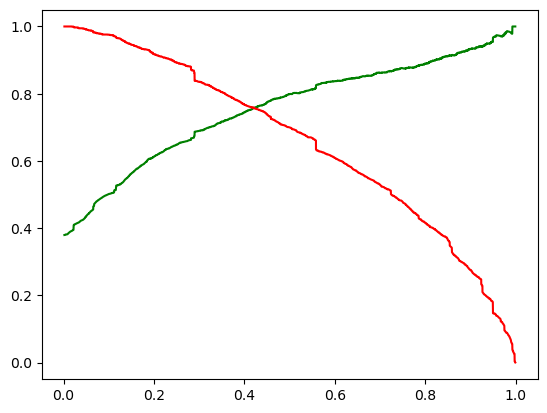

In [186]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [187]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.849539,7962,1,1,1,1,1,1,1,1,1,1,0,1,85
1,0,0.138871,5520,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.084918,1962,0,1,0,0,0,0,0,0,0,0,0,0,8
3,1,0.948722,1566,1,1,1,1,1,1,1,1,1,1,1,1,95
4,0,0.289856,9170,0,1,1,1,0,0,0,0,0,0,0,0,29


In [188]:
#Model Evaluation

# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8086942875078468


In [189]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3260,  693],
       [ 526, 1893]])

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
from sklearn.metrics import precision_score,recall_score

In [192]:
# Precision = TP / TP + FP
print("Precision  : ",precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision  :  0.7320185614849188


In [193]:
#Recall = TP / TP + FN
print("Recall  : ",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall  :  0.7825547747002893


### On test set:-

In [195]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [196]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.253387,0,25
1,4050,1,0.977387,1,98
2,7201,0,0.263284,0,26
3,1196,0,0.253012,0,25
4,8219,1,0.200898,0,20


In [197]:
# Let's check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.816550714024167


In [198]:
# Making the confusion matrix:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  292],
       [ 209,  833]])

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
from sklearn.metrics import precision_score,recall_score

In [201]:
# Precision = TP / TP + FP
print("Precision  : ",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision  :  0.7404444444444445


In [202]:
#Recall = TP / TP + FN
print("Recall  : ",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall  :  0.7994241842610365


## Results :
### 1) Comparing the values obtained for Train & Test:

## Train Data:

#### -Accuracy :     80.8 %
#### -Sensitivity :  78.2 %
#### -Specificity :  82.4 %
#### -Precision   :  73.2 %
#### -Recall      :  78.2 %

### Test Data:

#### -Accuracy :     81.6 %
#### -Sensitivity :  80 %
#### -Specificity :  82.7%
#### -Precision   :  74 %
#### -Recall      :  80 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### 2)Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [207]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,4050,1,0.977387,1,98
9,8187,0,0.954259,1,95
20,2052,1,0.899541,1,90
23,7005,1,0.993433,1,99
46,5353,1,0.909696,1,91
...,...,...,...,...,...
2717,6163,1,0.915467,1,92
2718,1467,1,0.965996,1,97
2719,4781,1,0.997850,1,100
2729,8043,1,0.958385,1,96


#### So there are 435 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are:

In [209]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4050, 8187, 2052, 7005, 5353, 4844, 7989, 9233, 7725, 8075, 1897,
       1525, 4409, 1883,  802,  737, 5376, 8681, 7445, 1612, 6727, 4548,
       1157, 5258, 2852, 8650, 9043, 4173, 3671, 8415, 7320, 7719, 2664,
       9228,  785,  446, 3425, 5502, 1490, 8118, 4187, 5815, 7268, 5356,
       5641, 7093, 6170, 8867,  337,  211, 9062, 1594, 2489, 4250, 2460,
       3983, 1737, 3407, 6647, 5090, 6314, 2584, 1614, 1557, 8594, 4359,
       7877, 4992, 1979, 8268, 5868, 8902, 7121, 5791, 1578, 3248, 5535,
       5964, 6386, 5137, 4662, 4048, 7883, 4028, 7469, 6193, 8110, 1957,
       2681, 3187, 3839, 5799, 5975,  373, 4285, 2674, 7089, 6617, 2153,
       2022, 8946, 3725, 3296, 1722, 5304, 4700, 8787, 1475, 2841,  505,
       6306, 1995,  112, 6127, 2765, 8309, 2860, 8596, 4365, 8897, 2662,
       6429, 5061, 4149, 6529, 3566, 4607, 6499, 6931, 5167, 4543, 2623,
       8687,  831, 6438, 2101, 7326, 4771, 1481, 4775, 7009, 5026, 7450,
       2475, 2067, 7606,  999, 4212, 2791,  822, 53

### 3) Finding out the Important Features from our final model:

In [372]:
res.params.sort_values(ascending=False)


Total Time Spent on Website                             1.078972
Lead Origin_Lead Add Form                               0.921377
What is your current occupation_Working Professional    0.629677
Lead Source_Olark Chat                                  0.378323
Last Activity_Page Visited on Website                  -0.270248
Last Activity_Converted to Lead                        -0.292159
Specialization_others                                  -0.350695
Lead Origin_Landing Page Submission                    -0.406182
Do Not Email                                           -0.443754
What is your current occupation_not provided           -0.517307
Last Notable Activity_Email Opened                     -0.521870
Last Activity_Olark Chat Conversation                  -0.534478
Last Notable Activity_Modified                         -0.560417
const                                                  -0.692151
dtype: float64